In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

COLUMNAS NODE -> LOADBALANCER

In [170]:
# OPERATION TYPE_BLANCER TIME_SERVICE ARRIVAL_TIME EXIT_TIME LATENCIE_TIME
columnsLN = ["TIME", "LOG", "NODE_ID", "OPERATION", "TYPE_BALANCER", "SERVICE_TIME", "ARRIVAL_TIME", "EXIT_TIME","LATENCE_TIME", "ID"]

BALANCER Z (FUNCTION)

In [171]:
z_df = pd.read_csv("Correlations/w1/logs/lb_generic_z_0_info.log", sep=" ", names=columnsLN)

In [172]:
z_df.head(5)

,TIME,LOG,NODE_ID,OPERATION,TYPE_BALANCER,SERVICE_TIME,ARRIVAL_TIME,EXIT_TIME,LATENCE_TIME,ID
0,1646864718,INFO,lb_generic_z_0,BALANCE_Z,CLASS,1.036172,1.646865e+09,1.646865e+09,0.009240,lb_generic_z_0
1,1646864789,INFO,lb_generic_z_0,BALANCE_Z,CLASS,1.036583,1.646865e+09,1.646865e+09,0.006662,lb_generic_z_0
2,1646864860,INFO,lb_generic_z_0,BALANCE_Z,CLASS,0.863841,1.646865e+09,1.646865e+09,0.004545,lb_generic_z_0
3,1646864931,INFO,lb_generic_z_0,BALANCE_Z,CLASS,1.027320,1.646865e+09,1.646865e+09,0.006052,lb_generic_z_0
4,1646865002,INFO,lb_generic_z_0,BALANCE_Z,CLASS,0.913067,1.646865e+09,1.646865e+09,0.005818,lb_generic_z_0


In [200]:
# save lists
meadianZ = list()
meanZ = list()
z_dfList = list()
# set figures
# fig = plt.figure()
# fig, axs = plt.subplots(5, sharex=True, sharey=True)
# read all csv

columnsToJoin = ["TEST_ID", "OPERATION", "TYPE_BALANCER", "SERVICE_TIME"]
for x in range(1,6):
    # read file
    z_df = pd.read_csv("Correlations/w{}/logs/lb_generic_z_0_info.log".format(x), sep=" ", names=columnsLN)
    # drop rows with node created
    z_df.drop(z_df[z_df["OPERATION"]=="CREATED_NODE"].index, inplace=True)
    # label of test
    test_ = np.repeat("test_{}".format(x),z_df.shape[0])
    z_df.insert(2, "TEST_ID",test_)
    # save df with columns custom
    z_dfList.append(z_df[columnsToJoin])
    # median and mean
    meanZ.append(z_df.groupby("ID").mean()["SERVICE_TIME"].values)
    meadianZ.append(z_df.groupby("ID").median()["SERVICE_TIME"].values)
df_join = pd.concat(z_dfList)
df_join

,TEST_ID,OPERATION,TYPE_BALANCER,SERVICE_TIME
0,test_1,BALANCE_Z,CLASS,1.036172
1,test_1,BALANCE_Z,CLASS,1.036583
2,test_1,BALANCE_Z,CLASS,0.863841
3,test_1,BALANCE_Z,CLASS,1.027320
4,test_1,BALANCE_Z,CLASS,0.913067
...,...,...,...,...
26,test_5,BALANCE_Z,CLASS,1.531634
27,test_5,BALANCE_Z,CLASS,1.738416
28,test_5,BALANCE_Z,CLASS,1.606509
29,test_5,BALANCE_Z,CLASS,1.749598


In [204]:
def boxplot(x, y, data, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.boxenplot(x=x,y=y, data=data, linewidth=2, saturation=4)
    plt.title(title, fontsize = 20)
    return ax

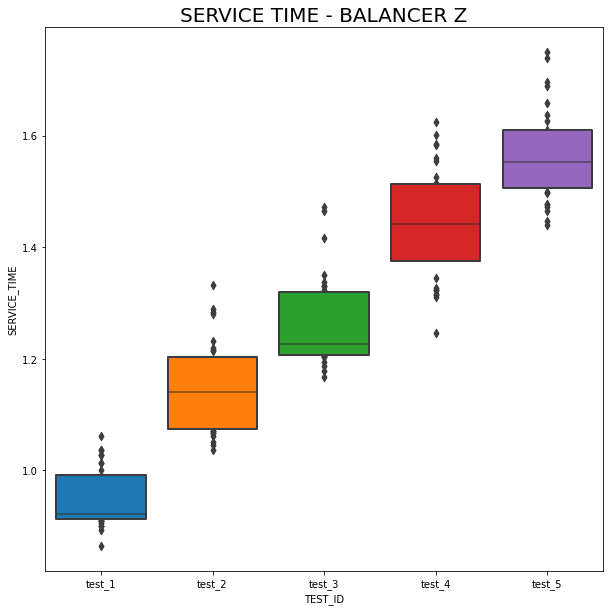

In [208]:
# fig, ax = plt.subplots(figsize=(10, 10))
# sns.boxenplot(x="TEST_ID",y="SERVICE_TIME", data=df_join, linewidth=2, saturation=4)
# plt.title("SERVICE TIME - BALANCER Z", fontsize = 20)
ax = boxplot(x="TEST_ID",y="SERVICE_TIME", title="SERVICE TIME - BALANCER Z", data=df_join)


Text(0.5, 1.0, 'SERVICE TIME - BALANCER Z')

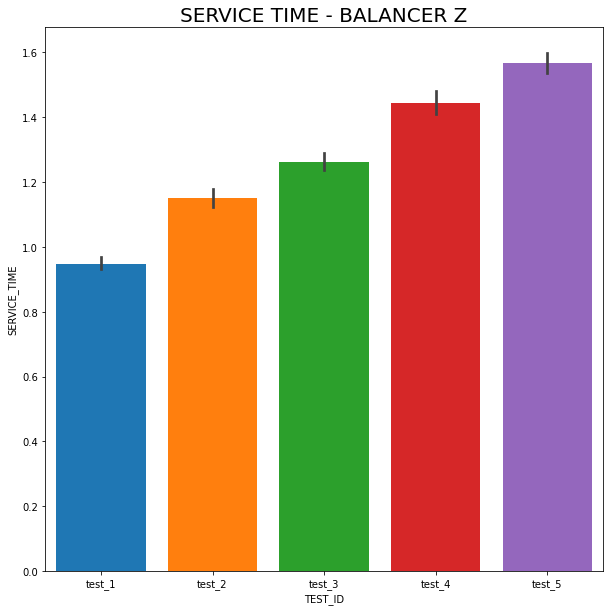

In [193]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="TEST_ID",y="SERVICE_TIME", data=df_join, linewidth=2, saturation=4)
plt.title("SERVICE TIME - BALANCER Z", fontsize = 20)

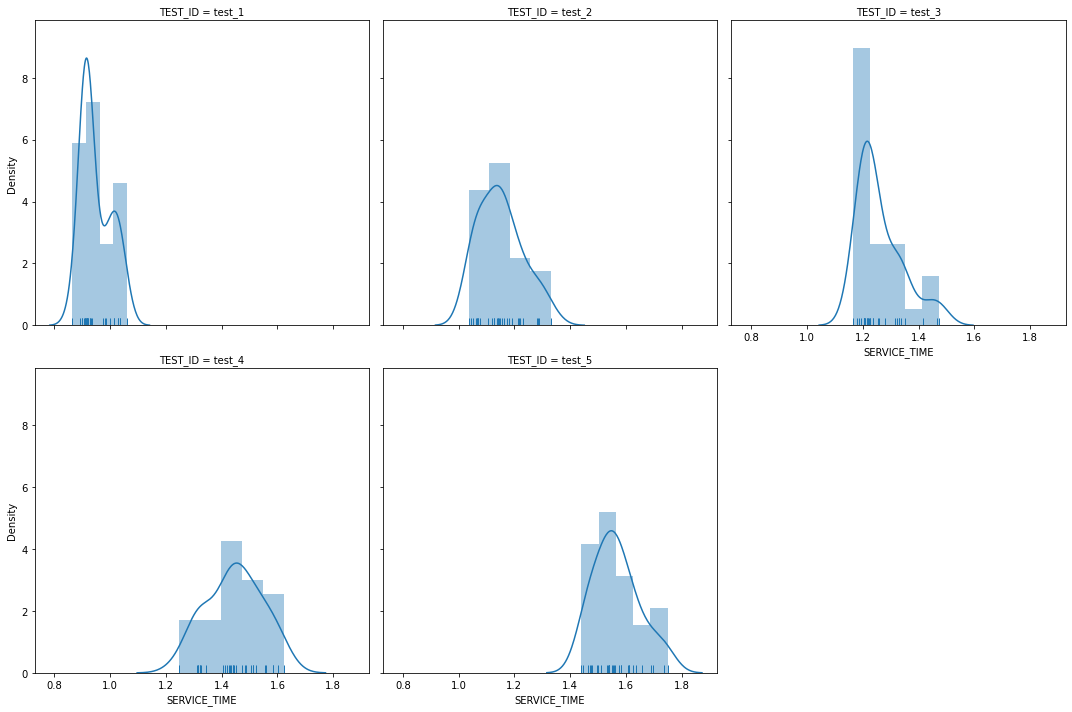

In [190]:
g = sns.FacetGrid(data = df_join, col="TEST_ID",col_wrap=3, height=4.5, size=5,margin_titles=True, despine=False, aspect=1)
p1 = g.map(sns.distplot, "SERVICE_TIME",hist=True, rug=True)

BALANCER TEMPORAL

In [286]:
allTemporal = list()
for x in range(1,6):
    wTemporal = list()
    sf_aux = pd.DataFrame()
    print("----- TEST {}".format(x))
    for y in range(x):
        print("TEMP {}".format(y))
        temporal_df = pd.read_csv("Correlations/w{}/logs/lb_generic_tem_{}_info.log".format(x,y), sep=" ", names=columnsLN)
        temporal_df.drop(temporal_df[temporal_df["OPERATION"] =="CREATED_NODE"].index, inplace=True)
        temporal_df.drop(temporal_df[temporal_df["OPERATION"] =="CONNECTION_SUCCESSFULLY"].index, inplace=True)
        test_ = np.repeat("test_{}".format(x),temporal_df.shape[0])
        temporal_df.insert(3, "TEST_ID",test_)
        wTemporal.append(temporal_df)
        # print(temporal_df.NODE_ID.unique())
    sf_aux = pd.concat(wTemporal)
    allTemporal.append(sf_aux)
df_temp = pd.concat(allTemporal)

----- TEST 1
TEMP 0
----- TEST 2
TEMP 0
TEMP 1
----- TEST 3
TEMP 0
TEMP 1
TEMP 2
----- TEST 4
TEMP 0
TEMP 1
TEMP 2
TEMP 3
----- TEST 5
TEMP 0
TEMP 1
TEMP 2
TEMP 3
TEMP 4


In [283]:
df_temp.NODE_ID.unique()

array(['lb_generic_tem_0', 'lb_generic_tem_1', 'lb_generic_tem_2'],
      dtype=object)

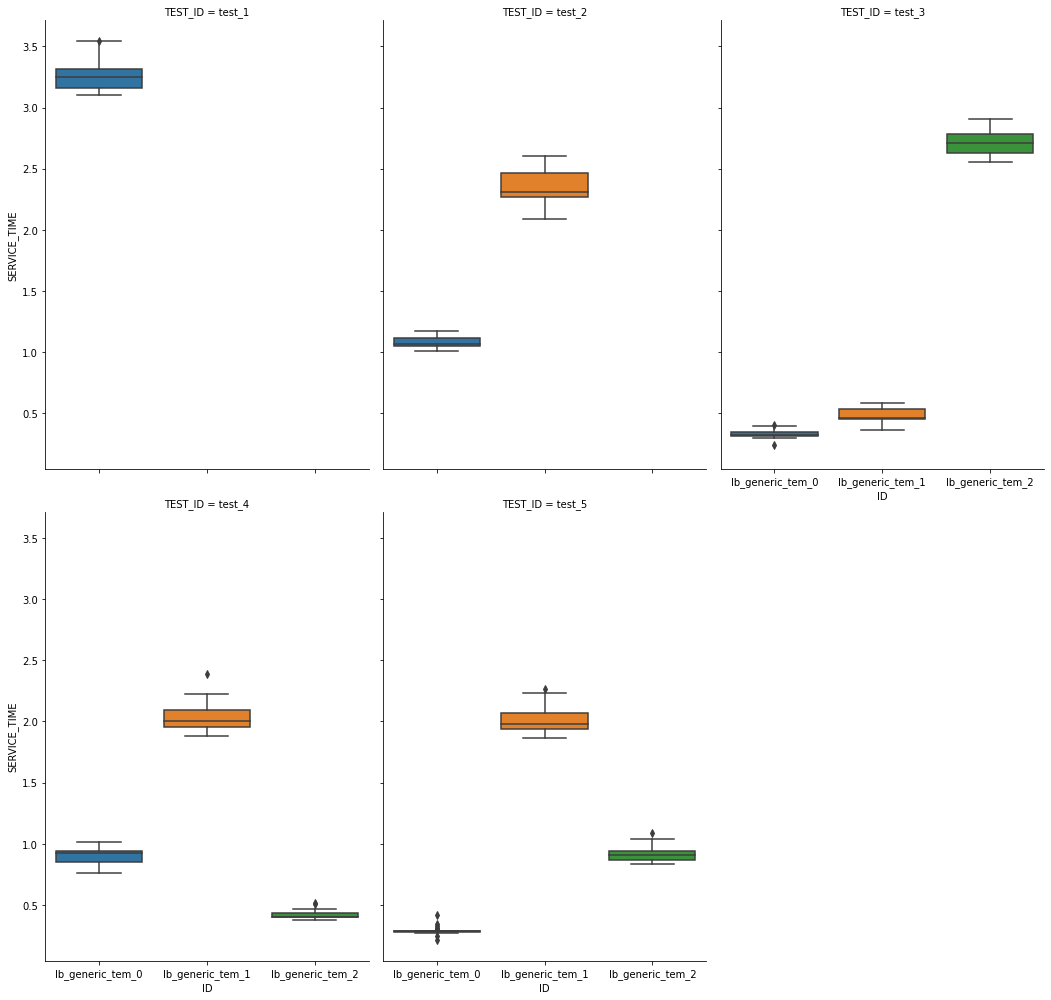

In [282]:
g = sns.catplot(x="ID", y="SERVICE_TIME", col="TEST_ID",
                data=df_temp, kind="box",
                height=8, aspect=.7, size=7,col_wrap=3)